## Unit 5 | Assignment - The Power of Plots

## Background

What good is data without a good plot to tell the story?

So, let's take what you've learned about Python Matplotlib and apply it to some real-world situations. For this assignment, you'll need to complete **1 of 2** Data Challenges. As always, it's your choice which you complete. _Perhaps_, choose the one most relevant to your future career.

## Option 1: Pyber



The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.

In [3]:
# Observed trend 1 There are more drivers in the urban area. 
# Observed trend 2 There are least amount of drivers in the rural area. 
# Observed trend 3 In average, urban area has lower fare rate compare to suburban and rural area. 

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# read city data file 
csv_path = "raw_data/city_data.csv"

city_data_df = pd.read_csv(csv_path)

city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [6]:
# read ride data file
csv_path_1 = "raw_data/ride_data.csv"
ride_data_df = pd.read_csv(csv_path_1)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [7]:
# left keeps all info of left table, inner keeps only info that's same
merged_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# merged_df = ride_data_df.merge(city_data_df, how="left", on="city")

In [8]:
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [9]:
# merge two csv files
a = pd.read_csv(csv_path)
b = pd.read_csv(csv_path_1)

merged_df = a.merge(b, how= "left", on='city')
# merged_df.to_csv("output.csv", index=False)
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [10]:
# Average Fare ($) Per City

average_fare = merged_df.groupby("city")
average_fare

In [11]:
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [12]:
# filter data into urban, suburban, rural
urban = merged_df[merged_df["type"] == "Urban"]
suburban = merged_df[merged_df["type"] == "Suburban"]
rural = merged_df[merged_df["type"] == "Rural"]


In [13]:
# urban
# average fare per city
urban_avg_fare = urban.groupby(["city"]).mean()["fare"]

# total rides per city
urban_ride_count = urban.groupby(["city"]).count()["ride_id"]

# total drivers per city
urban_driver_count = urban.groupby(["city"]).mean()["driver_count"]

In [14]:
# suburban
# average fare per city
suburban_avg_fare = suburban.groupby(["city"]).mean()["fare"]

# total rides per city
suburban_ride_count = suburban.groupby(["city"]).count()["ride_id"]

# total drivers per city
suburban_driver_count = suburban.groupby(["city"]).mean()["driver_count"]


In [15]:
# rural 
#average fare per city
rural_avg_fare = rural.groupby(["city"]).mean()["fare"]

#total rides per city 
rural_ride_count = rural.groupby(["city"]).count()["ride_id"]
# total drivers per city
rural_driver_count = rural.groupby(["city"]).mean()["driver_count"]

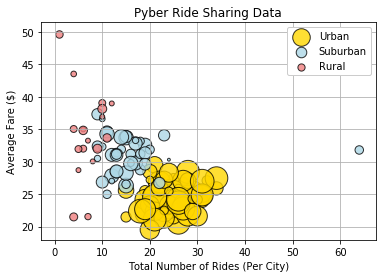

In [29]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=urban_driver_count*8, c="gold", 
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=suburban_driver_count*8, c="lightblue", 
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=rural_driver_count*8, c="lightcoral", 
            edgecolor="black", linewidth=1, 
            marker="o", alpha=0.8, label="Rural")



# x-axis labels, y-axis label, title, legend


plt.title('Pyber Ride Sharing Data')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend(framealpha=1,frameon = True)
plt.grid()





In [17]:
# create pie chart
# % of Total Fare by City Type

total_fare = merged_df["fare"].sum()

# Rural
total_rural_fare = rural.sum()["fare"]
percent_rural_fare = total_rural_fare / total_fare
# Urban
total_urban_fare = urban.sum()["fare"]
percent_urban_fare = total_urban_fare / total_fare
#Suburban
total_suburban_fare = suburban.sum()["fare"]
percent_suburban_fare = total_suburban_fare / total_fare




(-1.2938365741143927,
 1.1230436118441889,
 -1.1124092223511208,
 1.1090238632502027)

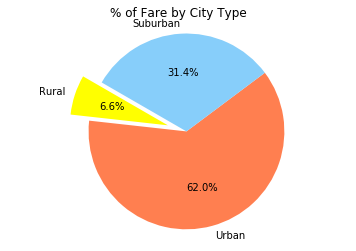

In [18]:
# Make the pie chart



labels = ["Rural", "Urban", "Suburban"]

sizes = [ percent_rural_fare, percent_urban_fare, percent_suburban_fare]

colors = ["yellow", "coral", "lightskyblue"]

explode = (0.2, 0, 0)
plt.title('% of Fare by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=150)
plt.axis("equal")

In [19]:
# % of Total Rides by City Type

# Total rides 
total_rides = merged_df["ride_id"].count()

# Rural
total_rural_rides = rural.count()["ride_id"]
percent_rural = total_rural_rides / total_rides
# Urban
total_urban_rides = urban.count()["ride_id"]
percent_urban = total_urban_rides / total_rides
#Suburban
total_suburban_rides = suburban.count()["ride_id"]
percent_suburban = total_suburban_rides / total_rides


(-1.2769094503594782,
 1.1246686542125084,
 -1.1169172062161421,
 1.1103530646553663)

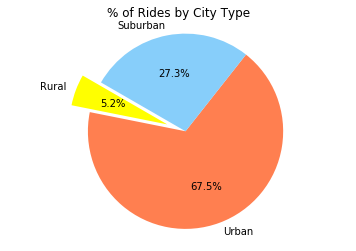

In [20]:
# Make the pie chart



labels = ["Rural", "Urban", "Suburban"]

sizes = [ percent_rural, percent_urban, percent_suburban]

colors = ["yellow", "coral", "lightskyblue"]

explode = (0.2, 0, 0)
plt.title('% of Rides by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=150)
plt.axis("equal")

In [33]:
# % of Total Drivers by City Type

total_driver = city_data_df["driver_count"].sum()
total_rural_driver = rural.sum()["driver_count"]
percent_rural_driver = total_rural_driver / total_driver

# urban_ride_count = urban.groupby(["city"]).count()["ride_id"]

total_urban_driver = urban.sum()["driver_count"]
percent_urban_driver = total_urban_driver / total_driver

total_suburban_driver = suburban.sum()["driver_count"]
percent_suburban_driver = total_suburban_driver / total_driver


(-1.1069089285371148,
 1.1069851524731327,
 -1.1010048510570742,
 1.1066843645701143)

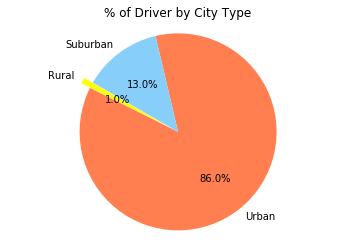

In [34]:
# Make the pie chart

labels = ["Rural", "Urban", "Suburban"]

sizes = [ percent_rural_driver, percent_urban_driver, percent_suburban_driver]

colors = ["yellow", "coral", "lightskyblue"]

explode = (0.1, 0, 0)
plt.title('% of Driver by City Type')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=150)
plt.axis("equal")